In [28]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from scipy.stats import pearsonr
from numpy import cov

In [29]:
csv_file = "economic_freedom.csv"
freedom_data_df = pd.read_csv(csv_file)
freedom_data_df.head()

,freedom_id,country_name,index_year,overall_score,property rights,government integrity,judicial effectiveness,tax burden,government spending,fiscal health,business_freedom,labor freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
0,1,Afghanistan,2016,NaN,NaN,12.0,NaN,91.6,81.2,NaN,56.6,63.2,NaN,NaN,55.0,NaN
1,2,Albania,2016,65.9,35.0,33.0,NaN,87.8,75.0,NaN,67.6,51.5,81.7,87.6,70.0,70.0
2,3,Algeria,2016,50.1,25.0,36.0,NaN,81.0,59.4,NaN,62.1,48.2,68.1,60.8,30.0,30.0
3,4,Angola,2016,48.9,15.0,19.0,NaN,87.8,50.1,NaN,50.3,44.8,72.2,70.2,40.0,40.0
4,5,Argentina,2016,43.8,15.0,34.0,NaN,66.1,51.3,NaN,56.0,43.9,44.0,67.4,30.0,30.0


In [50]:
new_freedom_data = freedom_data_df[['freedom_id','country_name','index_year', 'overall_score']].copy()
new_freedom_data.columns = new_freedom_data.columns.str.replace(' ', '')
new_freedom_data.head()

,freedom_id,country_name,index_year,overall_score
0,1,Afghanistan,2016,NaN
1,2,Albania,2016,65.9
2,3,Algeria,2016,50.1
3,4,Angola,2016,48.9
4,5,Argentina,2016,43.8


In [51]:
v2_freedom_data= new_freedom_data[pd.notnull(new_freedom_data['overall_score'])]
v2_freedom_data.head()

,freedom_id,country_name,index_year,overall_score
1,2,Albania,2016,65.9
2,3,Algeria,2016,50.1
3,4,Angola,2016,48.9
4,5,Argentina,2016,43.8
5,6,Armenia,2016,67.0


In [52]:
csv2_file = "world_trade_banking.csv"
trading_data_df = pd.read_csv(csv2_file)
trading_data_df.head()

,trade_id,location,INDICATOR,SUBJECT,MEASURE,FREQUENCY,time,value,Flag Codes,Unnamed: 9,...,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256
0,1,AUS,BOP,TOT,PC_GDP,A,1960,-3.699664,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,AUS,BOP,TOT,PC_GDP,A,1961,-0.148368,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,AUS,BOP,TOT,PC_GDP,A,1962,-0.863598,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,AUS,BOP,TOT,PC_GDP,A,1963,-0.173224,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,AUS,BOP,TOT,PC_GDP,A,1964,-1.186808,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
trading_data = trading_data_df[['trade_id','location','time','value']].copy()
trading_data.columns = trading_data.columns.str.replace(' ', '')
trading_data.head()

,trade_id,location,time,value
0,1,AUS,1960,-3.699664
1,2,AUS,1961,-0.148368
2,3,AUS,1962,-0.863598
3,4,AUS,1963,-0.173224
4,5,AUS,1964,-1.186808


In [54]:
csv3_file="countrycode.csv"
countrycode_df = pd.read_csv(csv3_file)
countrycode_df.columns = countrycode_df.columns.str.replace(' ', '')
countrycode_df.head()

,location,country_name
0,ABW,Aruba
1,AFG,Afghanistan
2,AGO,Angola
3,AIA,Anguilla
4,ALA,Åland Islands


In [55]:
new_trading_data = pd.merge(trading_data,countrycode_df, on="location")
new_trading_data.head()

,trade_id,location,time,value,country_name
0,1,AUS,1960,-3.699664,Australia
1,2,AUS,1961,-0.148368,Australia
2,3,AUS,1962,-0.863598,Australia
3,4,AUS,1963,-0.173224,Australia
4,5,AUS,1964,-1.186808,Australia


In [56]:
rds_connection_string = "postgres:postgres@localhost:5432/ETL_project2"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [57]:
engine.table_names()

['joined_data', 'v2_freedom_data', 'new_trading_data']

In [58]:
v2_freedom_data.to_sql(name='v2_freedom_data', con=engine, if_exists='append', index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "v2_freedom_data_pkey"
DETAIL:  Key (freedom_id)=(2) already exists.

[SQL: INSERT INTO v2_freedom_data (freedom_id, country_name, index_year, overall_score) VALUES (%(freedom_id)s, %(country_name)s, %(index_year)s, %(overall_score)s)]
[parameters: ({'freedom_id': 2, 'country_name': 'Albania', 'index_year': 2016, 'overall_score': 65.9}, {'freedom_id': 3, 'country_name': 'Algeria', 'index_year': 2016, 'overall_score': 50.1}, {'freedom_id': 4, 'country_name': 'Angola', 'index_year': 2016, 'overall_score': 48.9}, {'freedom_id': 5, 'country_name': 'Argentina', 'index_year': 2016, 'overall_score': 43.8}, {'freedom_id': 6, 'country_name': 'Armenia', 'index_year': 2016, 'overall_score': 67.0}, {'freedom_id': 7, 'country_name': 'Australia', 'index_year': 2016, 'overall_score': 80.3}, {'freedom_id': 8, 'country_name': 'Austria', 'index_year': 2016, 'overall_score': 71.7}, {'freedom_id': 9, 'country_name': 'Azerbaijan', 'index_year': 2016, 'overall_score': 60.2}  ... displaying 10 of 3543 total bound parameter sets ...  {'freedom_id': 4039, 'country_name': 'Zambia', 'index_year': 1995, 'overall_score': 55.1}, {'freedom_id': 4040, 'country_name': 'Zimbabwe', 'index_year': 1995, 'overall_score': 48.5})]
(Background on this error at: http://sqlalche.me/e/gkpj)

In [59]:
new_trading_data.to_sql(name='new_trading_data', con=engine, if_exists='append', index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "new_trading_data_pkey"
DETAIL:  Key (trade_id)=(1) already exists.

[SQL: INSERT INTO new_trading_data (trade_id, location, time, value, country_name) VALUES (%(trade_id)s, %(location)s, %(time)s, %(value)s, %(country_name)s)]
[parameters: ({'trade_id': 1, 'location': 'AUS', 'time': 1960, 'value': -3.699664, 'country_name': 'Australia'}, {'trade_id': 2, 'location': 'AUS', 'time': 1961, 'value': -0.1483678, 'country_name': 'Australia'}, {'trade_id': 3, 'location': 'AUS', 'time': 1962, 'value': -0.8635976000000001, 'country_name': 'Australia'}, {'trade_id': 4, 'location': 'AUS', 'time': 1963, 'value': -0.1732235, 'country_name': 'Australia'}, {'trade_id': 5, 'location': 'AUS', 'time': 1964, 'value': -1.186808, 'country_name': 'Australia'}, {'trade_id': 6, 'location': 'AUS', 'time': 1965, 'value': -3.602264, 'country_name': 'Australia'}, {'trade_id': 7, 'location': 'AUS', 'time': 1966, 'value': -2.009925, 'country_name': 'Australia'}, {'trade_id': 8, 'location': 'AUS', 'time': 1967, 'value': -2.508705, 'country_name': 'Australia'}  ... displaying 10 of 1120 total bound parameter sets ...  {'trade_id': 1173, 'location': 'SAU', 'time': 2017, 'value': 1.519678, 'country_name': 'Saudi Arabia'}, {'trade_id': 1174, 'location': 'SAU', 'time': 2018, 'value': 8.977046000000001, 'country_name': 'Saudi Arabia'})]
(Background on this error at: http://sqlalche.me/e/gkpj)

In [60]:
pd.read_sql_query('select * from v2_freedom_data', con=engine).head()

,freedom_id,country_name,index_year,overall_score
0,2,Albania,2016,65.9
1,3,Algeria,2016,50.1
2,4,Angola,2016,48.9
3,5,Argentina,2016,43.8
4,6,Armenia,2016,67.0


In [61]:
pd.read_sql_query('select * from new_trading_data', con=engine).head()

,trade_id,location,time,value,country_name
0,1,AUS,1960,-3.699664,Australia
1,2,AUS,1961,-0.148368,Australia
2,3,AUS,1962,-0.863598,Australia
3,4,AUS,1963,-0.173224,Australia
4,5,AUS,1964,-1.186808,Australia


In [62]:
engine.table_names()

['joined_data', 'v2_freedom_data', 'new_trading_data']

In [63]:
pd.read_sql_query('select * from joined_data', con=engine).head()

,country_name,index_year,overall_score,value


In [66]:
csvj_file = "joined.csv"
joined_df = pd.read_csv(csvj_file)
joined_df

,trade_id,location,country_name,time,value,overall_score,gov_spending,business_freedom
0,36,AUS,Australia,1995,-18914.44,74.1,53.9,70.0
1,37,AUS,Australia,1996,-14718.47,74.0,53.4,70.0
2,38,AUS,Australia,1997,-12403.25,75.5,55.1,70.0
3,39,AUS,Australia,1998,-18663.68,75.6,54.8,70.0
4,40,AUS,Australia,1999,-22541.70,76.4,56.0,70.0
...,...,...,...,...,...,...,...,...
749,12334,SAU,Saudi Arabia,2012,164763.70,62.5,37.3,87.5
750,12335,SAU,Saudi Arabia,2013,135442.40,60.6,52.2,68.2
751,12336,SAU,Saudi Arabia,2014,73758.20,62.2,63.1,67.3
752,12337,SAU,Saudi Arabia,2015,-56723.79,62.1,61.9,65.8


In [67]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Global Trading Balance')

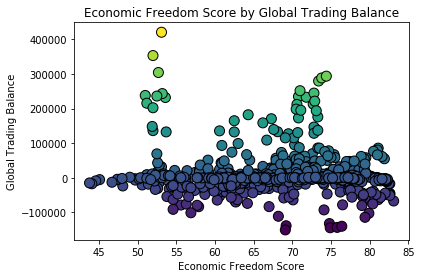

In [69]:
t=joined_df["value"]
plt.scatter(joined_df["overall_score"],joined_df["value"],marker="o",c=t,edgecolors="black", s=100, alpha=1)
plt.title("Economic Freedom Score by Global Trading Balance")
plt.xlabel("Economic Freedom Score")
plt.ylabel("Global Trading Balance")


Text(0, 0.5, 'Global Trading Balance')

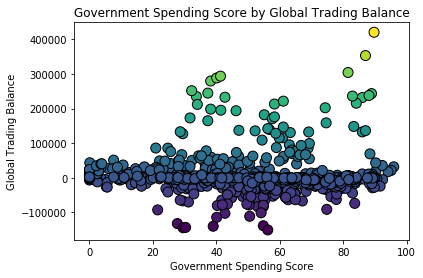

In [70]:
t=joined_df["value"]
plt.scatter(joined_df["gov_spending"],joined_df["value"],marker="o",c=t,edgecolors="black", s=100, alpha=1)
plt.title("Government Spending Score by Global Trading Balance")
plt.xlabel("Government Spending Score")
plt.ylabel("Global Trading Balance")

Text(0, 0.5, 'Global Trading Balance')

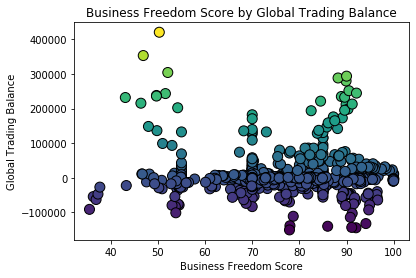

In [71]:
t=joined_df["value"]
plt.scatter(joined_df["business_freedom"],joined_df["value"],marker="o",c=t,edgecolors="black", s=100, alpha=1)
plt.title("Business Freedom Score by Global Trading Balance")
plt.xlabel("Business Freedom Score")
plt.ylabel("Global Trading Balance")

In [72]:
# Create two series: Global Trading Balance and Economic Freedom Score
Global_Trading_Balance = joined_df.iloc[0:754, 4]
Economic_Freedom_Score = joined_df.iloc[0:754, 5]
#print(Global_Trading_Balance)
print(Economic_Freedom_Score)

0      74.1
1      74.0
2      75.5
3      75.6
4      76.4
       ... 
749    62.5
750    60.6
751    62.2
752    62.1
753    62.1
Name: overall_score, Length: 754, dtype: float64


In [80]:
covariance = cov(Global_Trading_Balance, Economic_Freedom_Score)
print(covariance)

# calculate Pearson's correlation
corr, _ = pearsonr(Global_Trading_Balance, Economic_Freedom_Score)
print('Pearsons correlation: %.3f' % corr)

[[ 3.36748163e+09 -2.29768210e+04]
 [-2.29768210e+04  6.81748946e+01]]
Pearsons correlation: -0.048


In [74]:
# Create two series: Global Trading Balance and Government Spending Score
Global_Trading_Balance = joined_df.iloc[0:754, 4]
Government_Spending_Score = joined_df.iloc[0:754, 6]
#print(Global_Trading_Balance)
print(Government_Spending_Score)

0      53.9
1      53.4
2      55.1
3      54.8
4      56.0
       ... 
749    37.3
750    52.2
751    63.1
752    61.9
753    56.8
Name: gov_spending, Length: 754, dtype: float64


In [79]:
covariance = cov(Global_Trading_Balance, Government_Spending_Score)
print(covariance)

# calculate Pearson's correlation
corr, _ = pearsonr(Global_Trading_Balance, Government_Spending_Score)
print('Pearsons correlation: %.3f' % corr)

[[3.36748163e+09 5.41992010e+04]
 [5.41992010e+04 5.31840584e+02]]
Pearsons correlation: 0.040


In [76]:
# Create two series: Global Trading Balance and Business Freedom Score
Global_Trading_Balance = joined_df.iloc[0:754, 4]
Business_Freedom_Score = joined_df.iloc[0:754, 7]
#print(Global_Trading_Balance)
print(Business_Freedom_Score)

0      70.0
1      70.0
2      70.0
3      70.0
4      70.0
       ... 
749    87.5
750    68.2
751    67.3
752    65.8
753    69.9
Name: business_freedom, Length: 754, dtype: float64


In [78]:
covariance = cov(Global_Trading_Balance, Business_Freedom_Score)
print(covariance)

# calculate Pearson's correlation
corr, _ = pearsonr(Global_Trading_Balance, Business_Freedom_Score)
print('Pearsons correlation: %.3f' % corr)

[[ 3.36748163e+09 -1.50490124e+04]
 [-1.50490124e+04  1.58259193e+02]]
Pearsons correlation: -0.021
